<h1> <center> Ne Obliviscaris Member Top 10 2020 </center></h1>

<h2><center> Summary of results </center> </h2>

<center>These are the results of the 2020 Patreon member survey. </center>

<h3><center> Member Top 10 </center></h3>

<img src="2020Top10.png" alt="Smiley face" height=1200 width="1200">

<h3><center> Member Top 20 </center></h3>
<img src="2020Top20.png" alt="Smiley face" height="1200" width="1200">

<h3><center>Total Band Score </center></h3>
<img src="2020Total.png" alt="Smiley face" height="1200" width="1200">

<center> Data processed and plots made by <a href="mailto:d.marrable@curtin.edu.au">Daniel Marrable</a> </center>
<center> The code used to generate these data can be found <a href="https://github.com/marrabld/Neo2019/blob/master/data/2020count.ipynb">Here</a> <center>




In [49]:
import pandas as pd
import pylab
import numpy as np

## Read in the data file and preview the first few rows

In [50]:
#votes = pd.read_excel('Test Results.xlsx')
votes = pd.read_excel('Final-Ne Obliviscaris - Patreon Exclusive Top 10 Albums of 2020 (Responses).xlsx')
#votes = pd.read_excel('Persefone - Patreon Exclusive Top 10 (Responses).xlsx')

votes.head()

,Timestamp,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.
0,2020-11-29 06:10:32.346,Unleash the Archers - Abyss,Polaris - The Death of Me,Mors Principium EST - Seven,Oceans of Slumber - Oceans of Slumber,Emma Ruth Rundle + Thou - May Our Chambers Be ...,Draconian - Under A Godless Veil,Haken - Virus,Dark Tranquillity - Moment,Plini - Impulse Voices,Make Them Die Slowly - Ferox
1,2020-11-29 06:12:23.985,Haken - Virus,Kyros - Celexa Dreams,Caligula's Horse - Rise Radiant,Conception - State of Deception,Dreamcatcher - Dystopia: The Tree of Language,Caspian - On Circles,Unleash the Archers - Abyss,Pain of Salvation - Panther,Pyramaze - Epitaph,Long Distance Calling - How Do We Want To Live?
2,2020-11-29 06:27:41.307,AUÐN - Vökudraumsins Fangi,Havukruunu - Uinuos Syömein Sota,Oranssi Pazuzu - Mestarin Kynsi,Winterfylleth - The Reckoning Dawn,And Oceans - Cosmic World Mother,Dark Tranquillity - Moment,Lik - Misanthropic Breed,Orbit Culture - Nija,\tVader - Solitude in Madness,Lamb of God - Lamb of God
3,2020-11-29 06:37:40.054,Igorrr - Spirituality and Distortion,Beneath the Massacre - Fearmonger,The Black Dahlia Murder - Verminous,Batushka - Raskol,Misery Signals - Ultraviolet,Deftones - Ohms,New Found Glory - Forever + Ever x Infinity,Killer Be Killed - Reluctant Hero,Within the Ruins - Black Heart,Metallica - S&M2
4,2020-11-29 06:38:22.764,Ether Coven - Everything Is Temporary Except S...,Haken - Virus,Protest the Hero - Palimpsest,Alestorm - Quest For the Crystal Coconut,Emmure - Hindsight,Red - Declaration,Denzel Curry & Kenny Beats - UNLOCKED,Polaris - The Death of Me,Grey Daze - Amends,Omega Infinity - Solar Spectre


## Setup the score tier

In [51]:
score = np.linspace(10, 1, 10)
score

array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

## Here we go through each entry and split the band and album using `-` we also use `upper()`  to normalise the chars 

In [52]:
band = np.empty((votes.shape[0], votes.shape[1]), dtype=object)
album = np.empty_like(band)


for jj in range(votes.shape[1]):
    tmp = votes.iloc[:, jj]
    for ii, item in enumerate(tmp):
        try:
            ## we change all characters to uppercase and use the '-' to split sthe band and album 
            band[ii, jj], album[ii, jj] = tmp[ii].upper().split('-')  

            ## Strip the any leading or lagging white space
            band[ii, jj] = band[ii, jj].strip(' ')
            album[ii, jj] = album[ii, jj].strip(' ')
        except:
            ## If we fail for some reason we write the line number so we can comeback later and investigate
            band[ii, jj], album[ii, jj] == str(f'{ii},{jj}')




## Quick look at both data arrays band and album 

In [34]:
list_album = album.flatten()

In [42]:
a = np.unique(list_album).tolist()

In [47]:
unique_album = set(a)

In [48]:
import csv
with open('album_list.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(unique_album)

In [21]:
list_album = album.tolist()
set_album = set(list_album)
print(set_album)

TypeError: unhashable type: 'list'

In [53]:
band.shape

(51, 11)

In [54]:
album

array([[None, 'ABYSS', 'THE DEATH OF ME', 'SEVEN', 'OCEANS OF SLUMBER',
        'MAY OUR CHAMBERS BE FULL', 'UNDER A GODLESS VEIL', 'VIRUS',
        'MOMENT', 'IMPULSE VOICES', 'FEROX'],
       [None, 'VIRUS', 'CELEXA DREAMS', 'RISE RADIANT',
        'STATE OF DECEPTION', 'DYSTOPIA: THE TREE OF LANGUAGE',
        'ON CIRCLES', 'ABYSS', 'PANTHER', 'EPITAPH',
        'HOW DO WE WANT TO LIVE?'],
       [None, 'VÖKUDRAUMSINS FANGI', 'UINUOS SYÖMEIN SOTA',
        'MESTARIN KYNSI', 'THE RECKONING DAWN', 'COSMIC WORLD MOTHER',
        'MOMENT', 'MISANTHROPIC BREED', 'NIJA', 'SOLITUDE IN MADNESS',
        'LAMB OF GOD'],
       [None, 'SPIRITUALITY AND DISTORTION', 'FEARMONGER', 'VERMINOUS',
        'RASKOL', 'ULTRAVIOLET', 'OHMS', 'FOREVER + EVER X INFINITY',
        'RELUCTANT HERO', 'BLACK HEART', 'S&M2'],
       [None, 'EVERYTHING IS TEMPORARY EXCEPT SUFFERING', 'VIRUS',
        'PALIMPSEST', 'QUEST FOR THE CRYSTAL COCONUT', 'HINDSIGHT',
        'DECLARATION', 'UNLOCKED', 'THE DEATH OF ME

In [55]:
band

array([[None, 'UNLEASH THE ARCHERS', 'POLARIS', 'MORS PRINCIPIUM EST',
        'OCEANS OF SLUMBER', 'EMMA RUTH RUNDLE + THOU', 'DRACONIAN',
        'HAKEN', 'DARK TRANQUILLITY', 'PLINI', 'MAKE THEM DIE SLOWLY'],
       [None, 'HAKEN', 'KYROS', "CALIGULA'S HORSE", 'CONCEPTION',
        'DREAMCATCHER', 'CASPIAN', 'UNLEASH THE ARCHERS',
        'PAIN OF SALVATION', 'PYRAMAZE', 'LONG DISTANCE CALLING'],
       [None, 'AUÐN', 'HAVUKRUUNU', 'ORANSSI PAZUZU', 'WINTERFYLLETH',
        'AND OCEANS', 'DARK TRANQUILLITY', 'LIK', 'ORBIT CULTURE',
        '\tVADER', 'LAMB OF GOD'],
       [None, 'IGORRR', 'BENEATH THE MASSACRE',
        'THE BLACK DAHLIA MURDER', 'BATUSHKA', 'MISERY SIGNALS',
        'DEFTONES', 'NEW FOUND GLORY', 'KILLER BE KILLED',
        'WITHIN THE RUINS', 'METALLICA'],
       [None, 'ETHER COVEN', 'HAKEN', 'PROTEST THE HERO', 'ALESTORM',
        'EMMURE', 'RED', 'DENZEL CURRY & KENNY BEATS', 'POLARIS',
        'GREY DAZE', 'OMEGA INFINITY'],
       [None, 'COUNTLESS SKIES', "

## We count the number of occurencies that are the same.  :: NOT checking for typos here just yet.  we will worry about that later

In [56]:
band_count_list = []
album_count_list = []

for ii in range(band.shape[1]):
    band_count_list.append(pd.Series(band[:, ii]).value_counts())
    #album_count_list.append(pd.Series(album[:, ii]).value_counts())

In [57]:
print(len(band_count_list))
#print(len(album_count_list))

11


## We plot the number of votes each band got in the top tier 

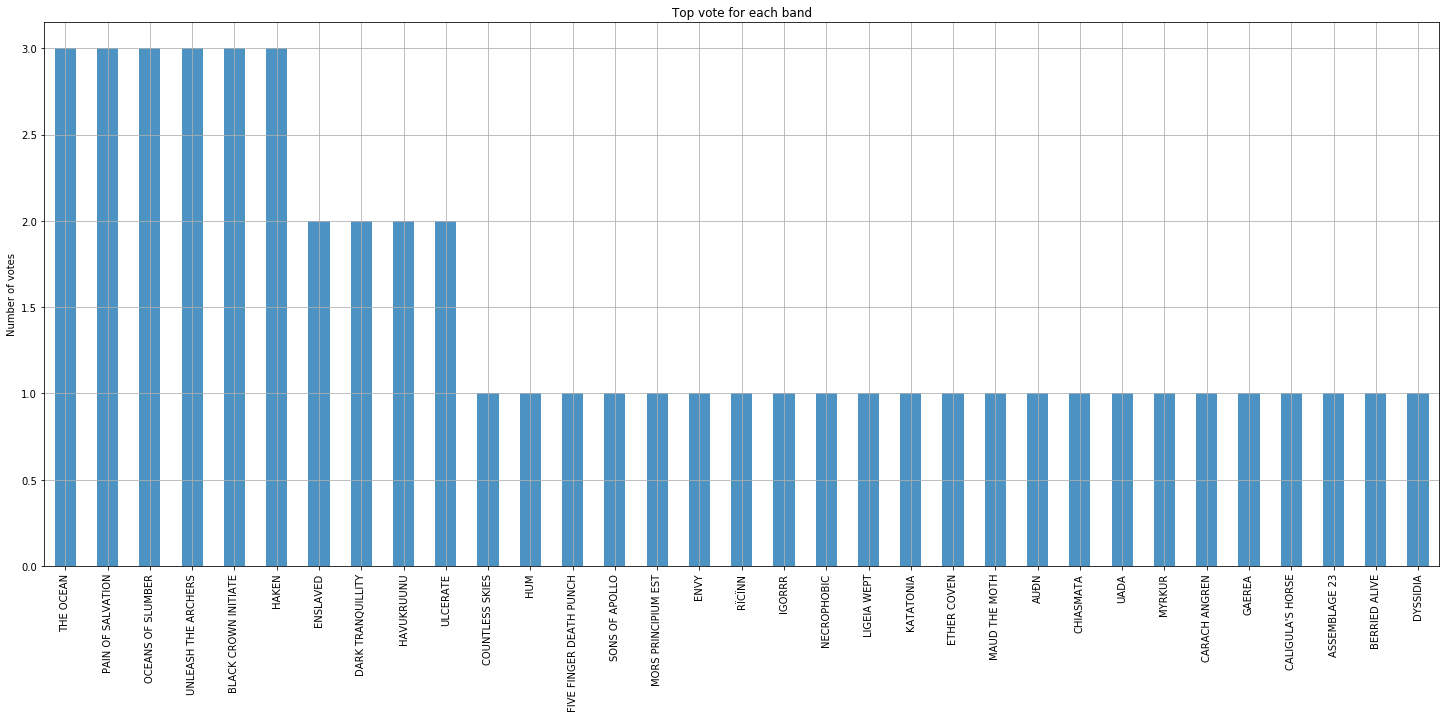

In [58]:
pylab.figure(figsize=(25,10))
band_count_list[1].plot('bar', alpha=0.8)

pylab.title('Top vote for each band')
pylab.ylabel('Number of votes')
pylab.grid()

## now for each tier

1
2
3
4
5
6
7
8
9
10


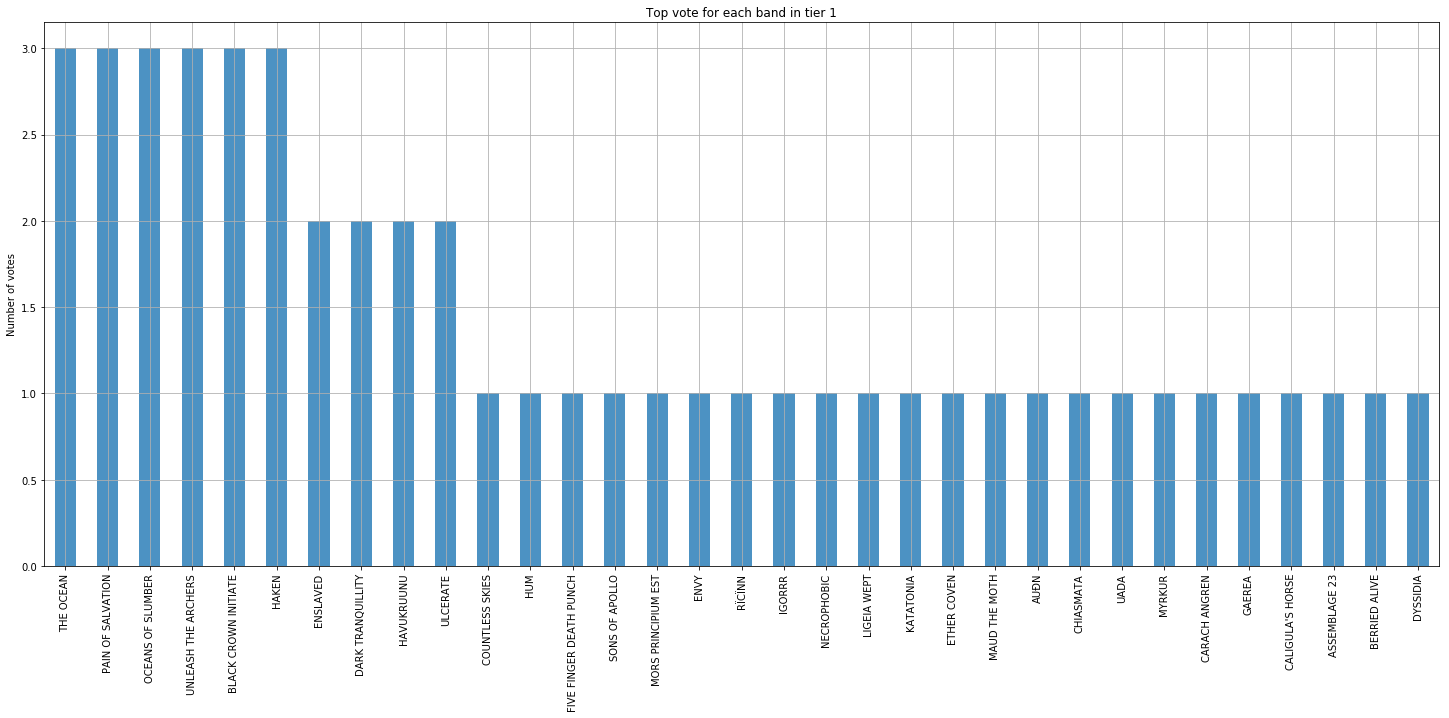

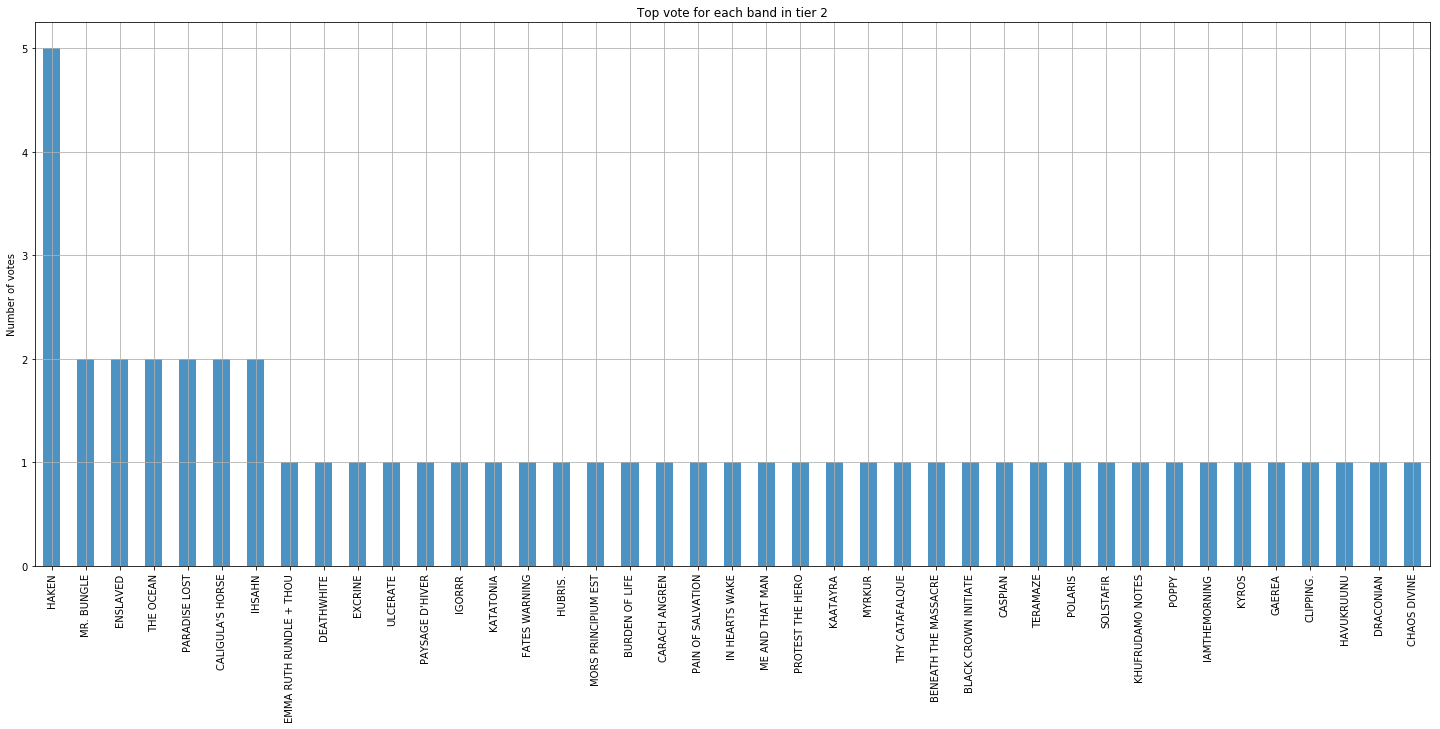

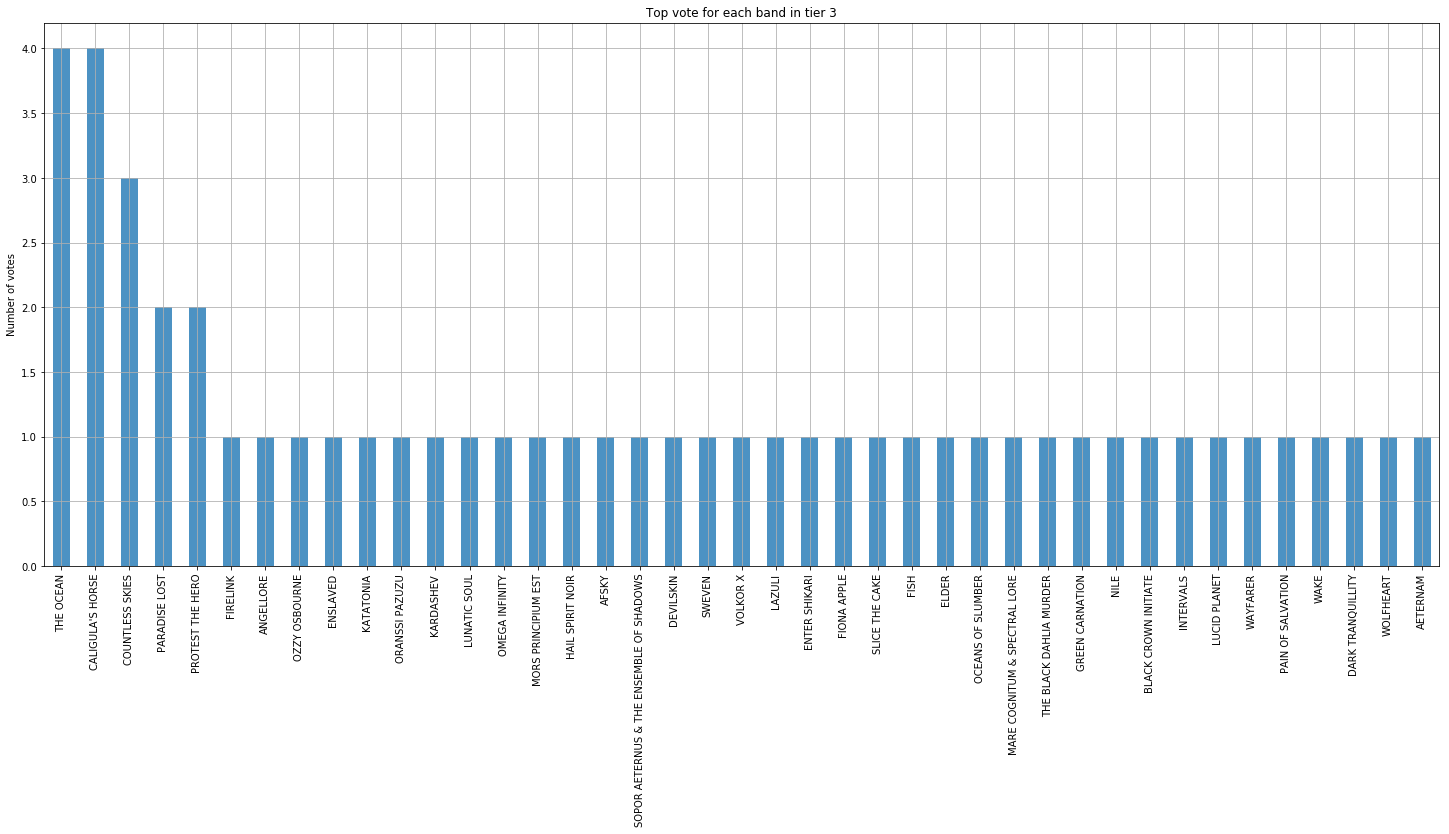

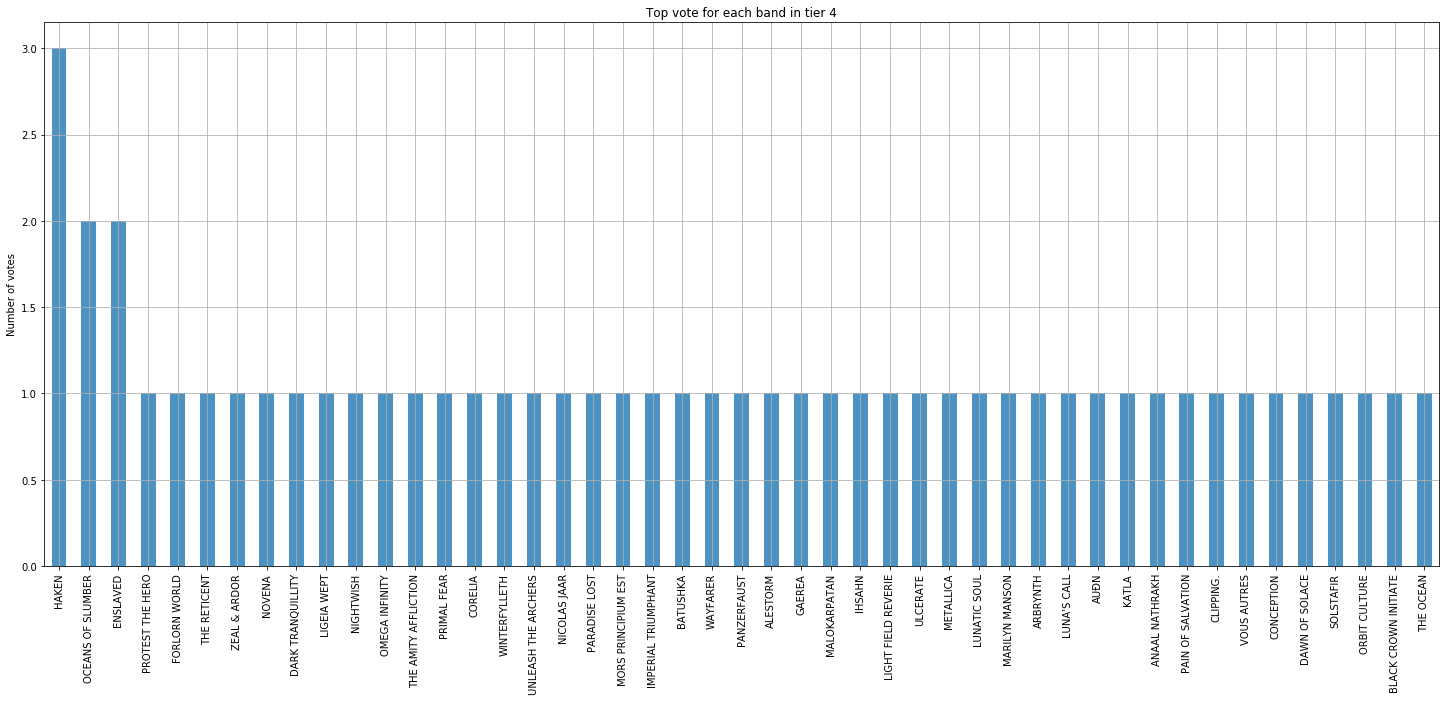

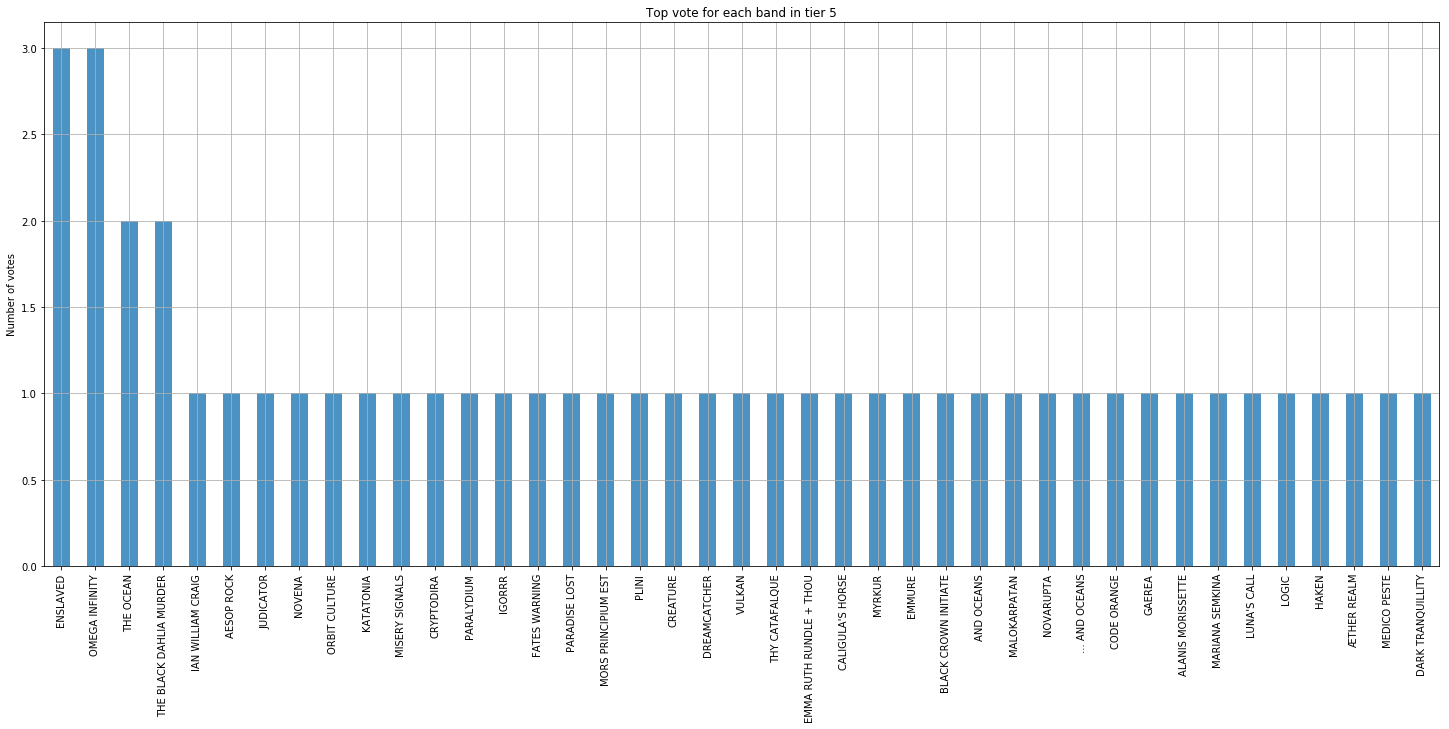

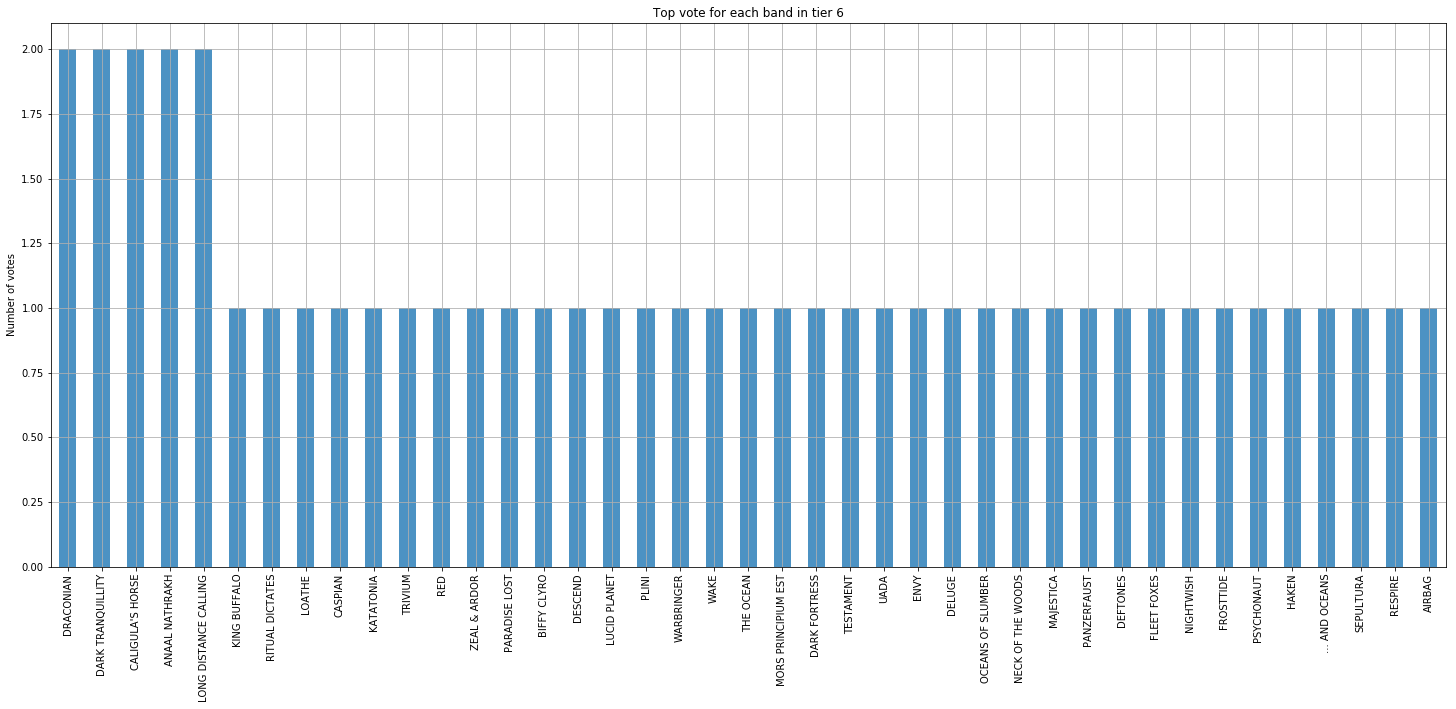

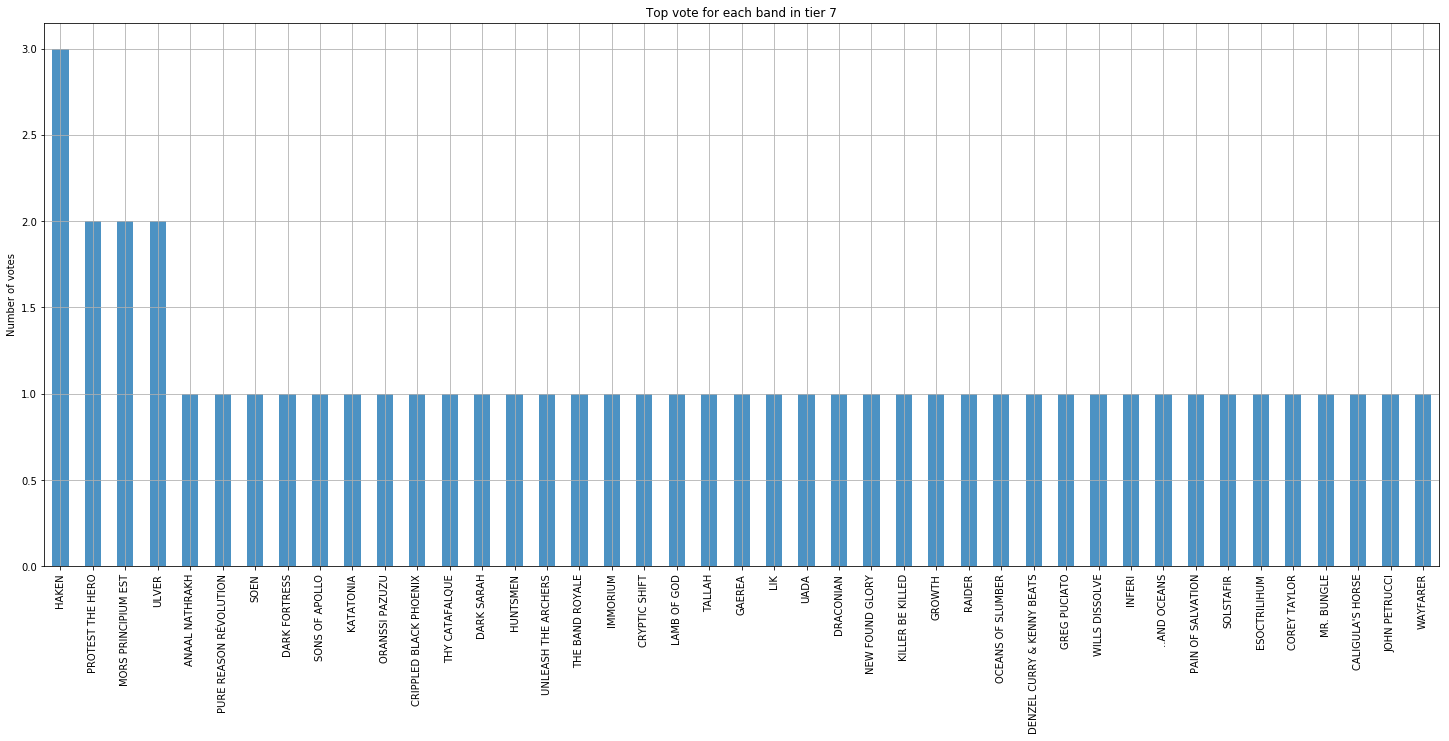

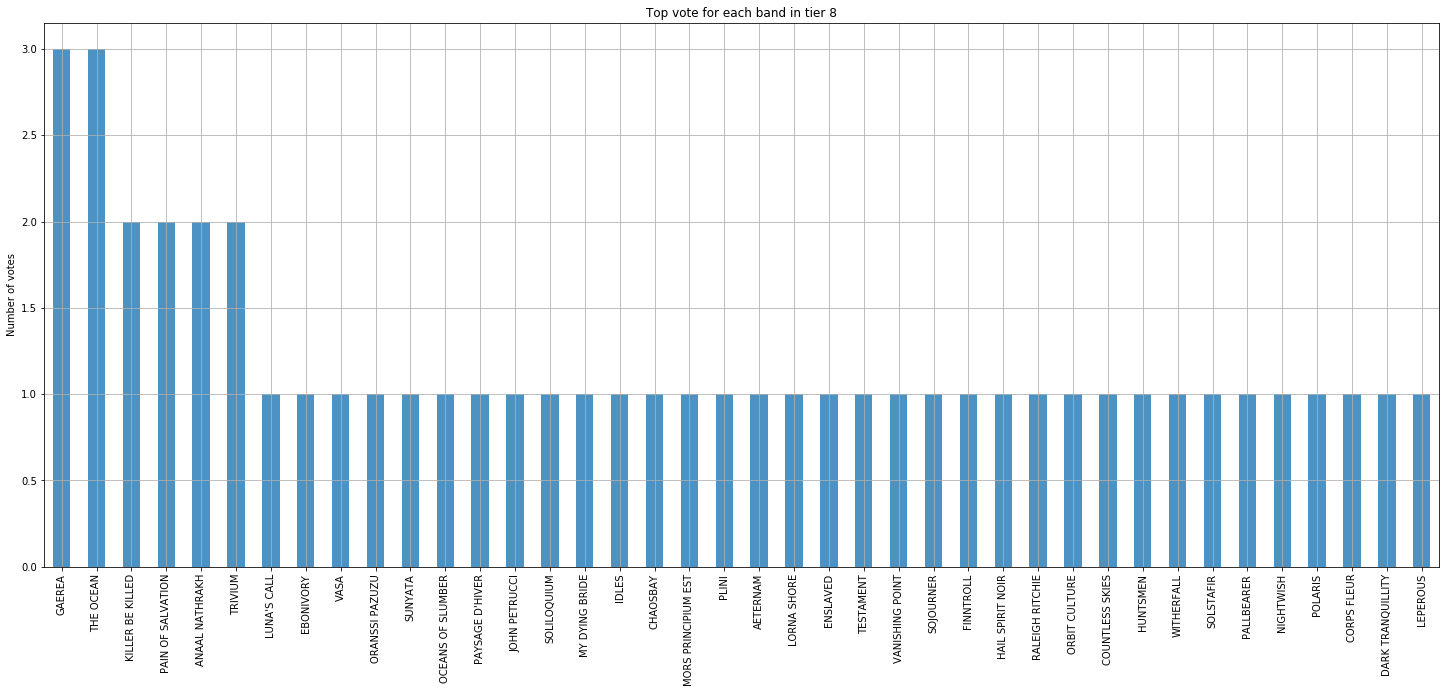

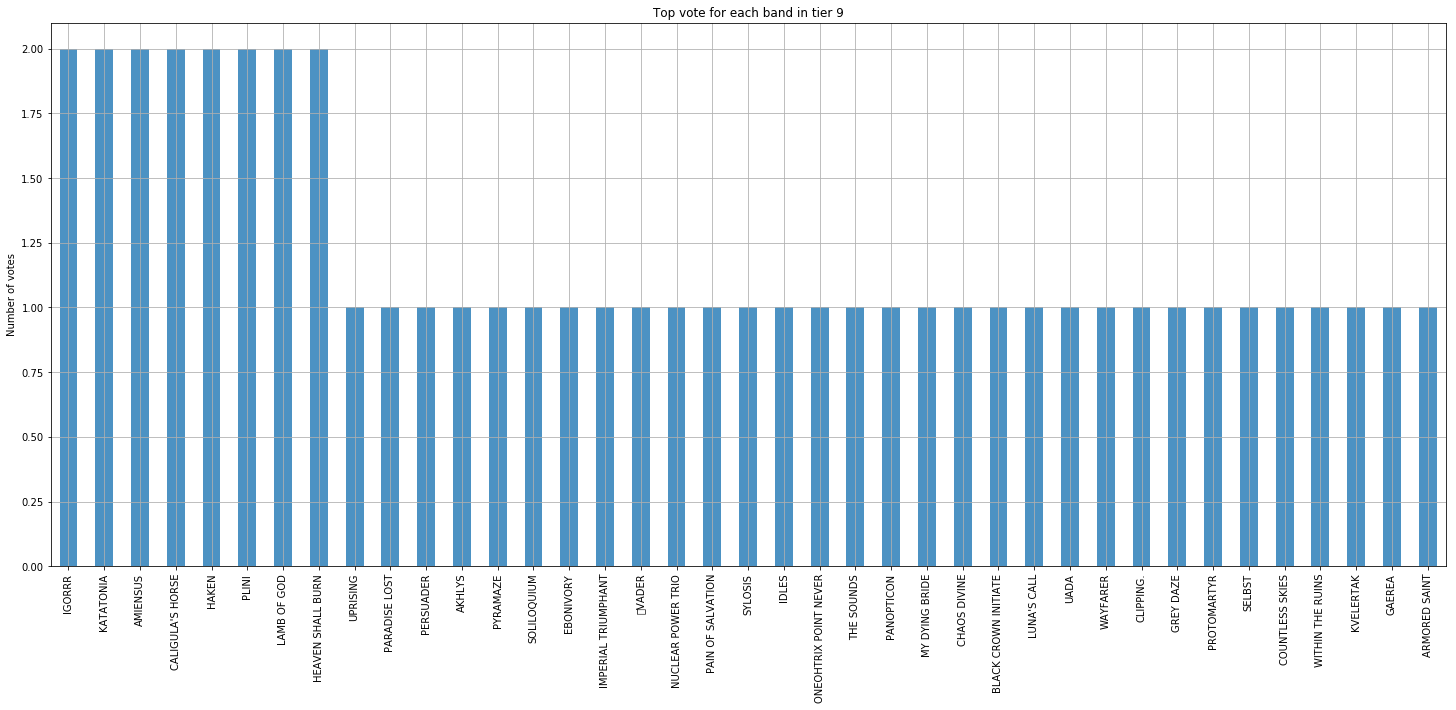

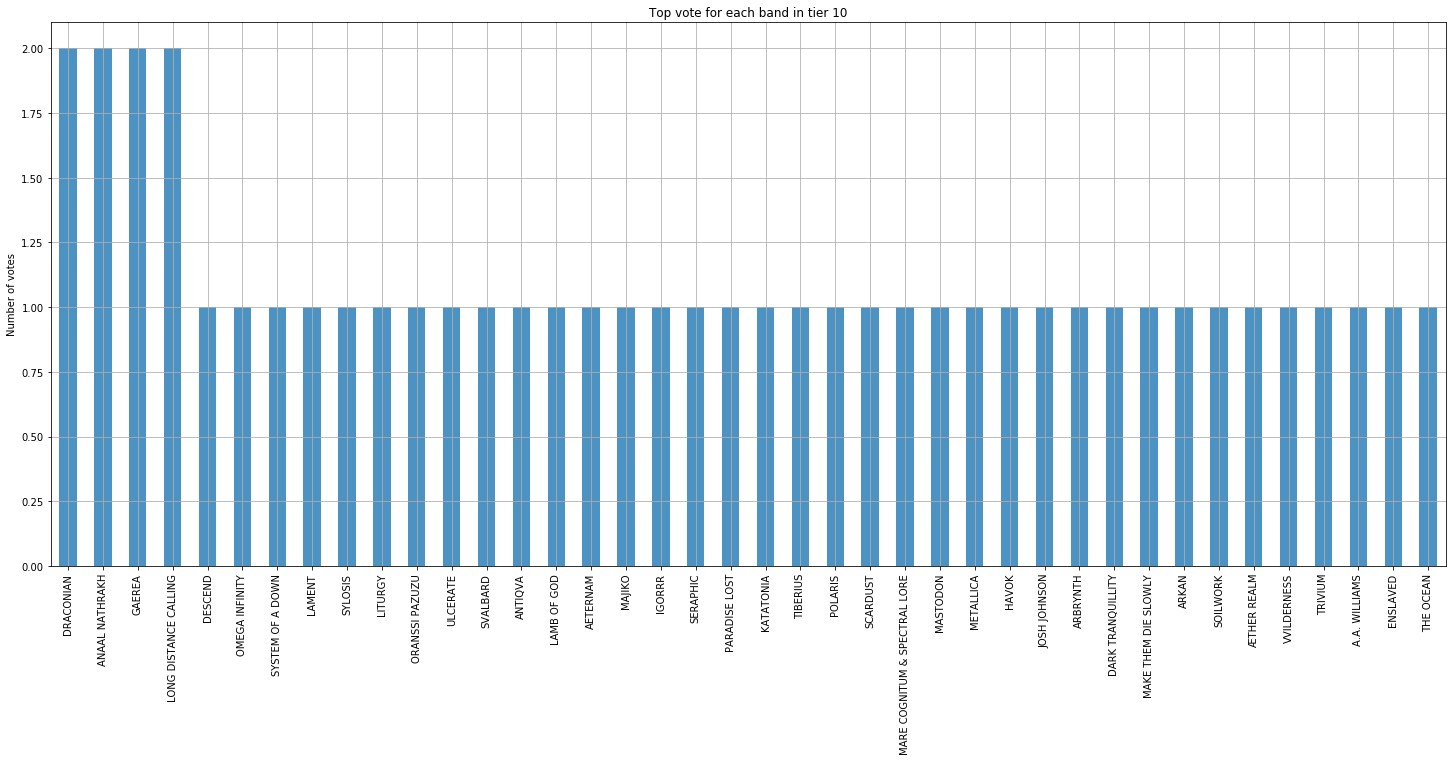

In [59]:
for ii in range (1,11):
    print(ii)
    pylab.figure(figsize=(25,10))
    band_count_list[ii].plot('bar', alpha=0.8)

    pylab.title(f'Top vote for each band in tier {ii}')
    pylab.ylabel('Number of votes')
    pylab.grid()

## Lets look at how many votes each band got in total

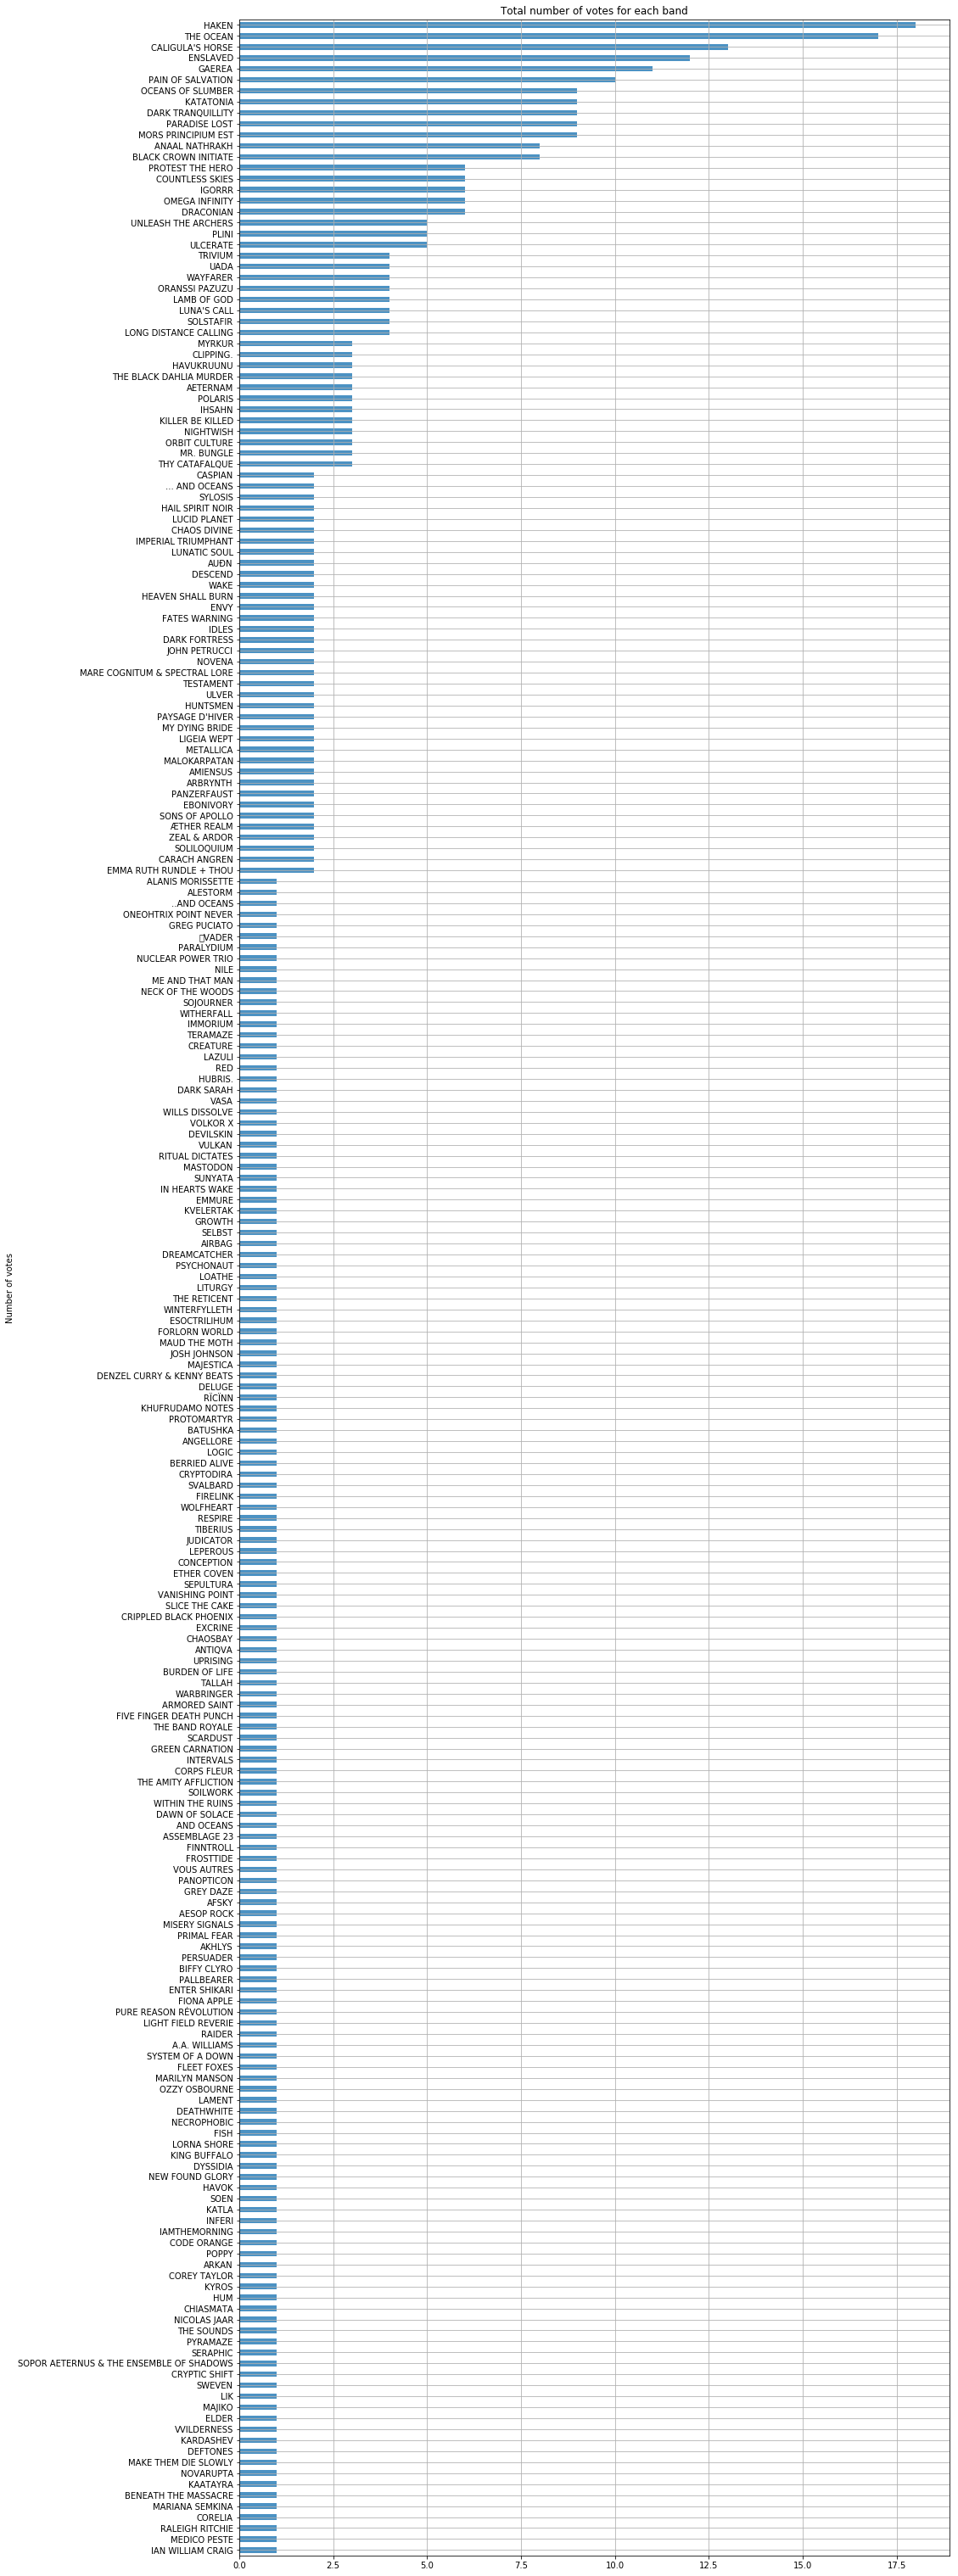

In [60]:

pylab.figure(figsize=(15,55))
stack = []   ## Merge all of the counts
for ii in range(band.shape[1]):
    for jj in range(band.shape[0]):
        stack.append(band[jj, ii])

bname = pd.Series(stack).value_counts(ascending=True)
pd.Series(stack).value_counts(ascending=True).plot('barh', alpha=0.8)

pylab.title('Total number of votes for each band')
pylab.ylabel('Number of votes')
pylab.grid()
pylab.savefig('2020TotalVotes.png')

## And again for each album 

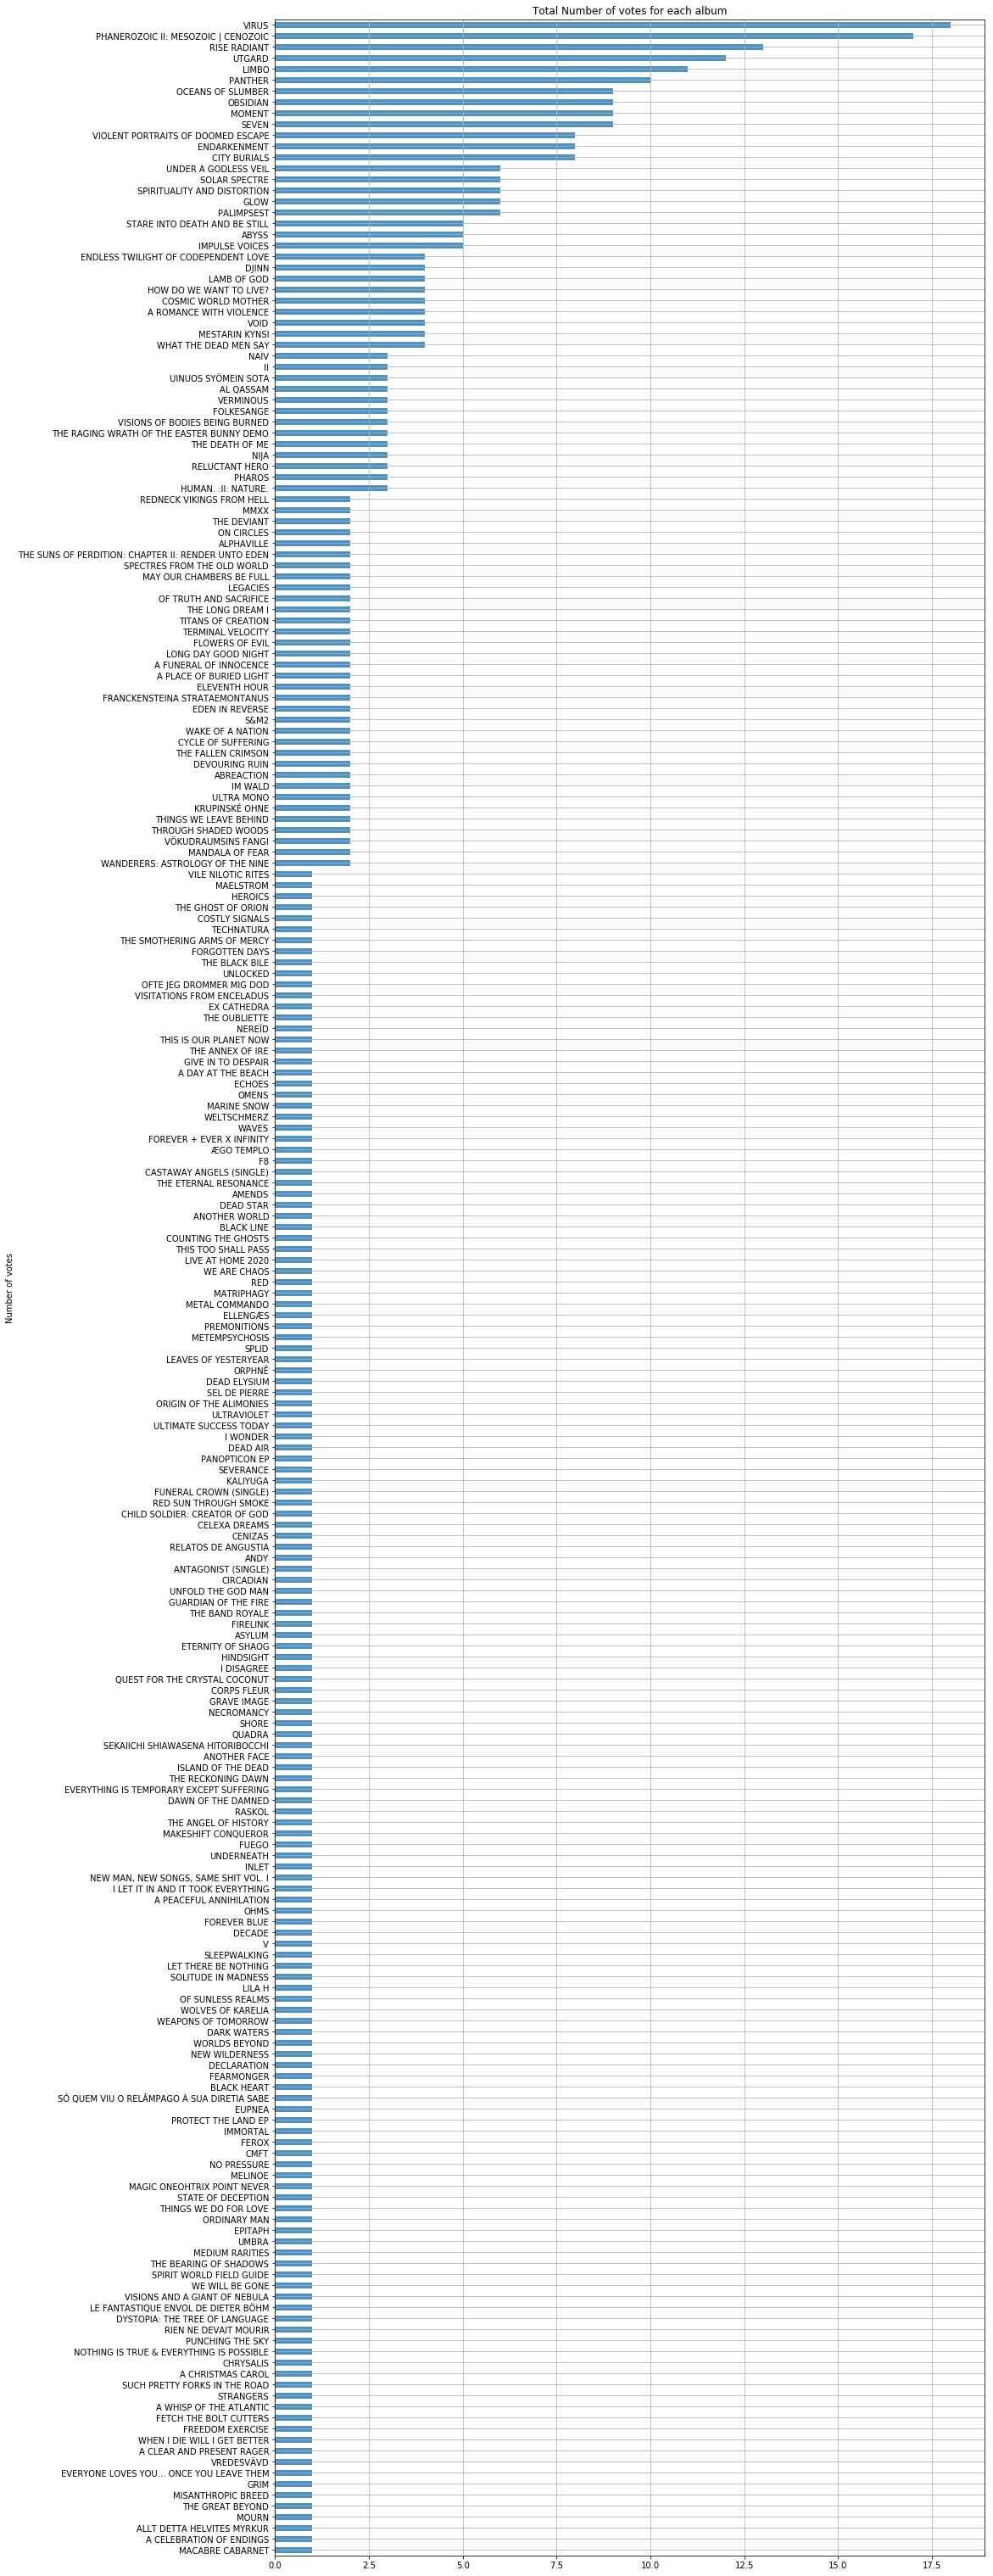

In [61]:
pylab.figure(figsize=(15, 55))
stack = []
for ii in range(album.shape[1]):
    for jj in range(album.shape[0]):
        stack.append(album[jj, ii])

aname = pd.Series(stack).value_counts(ascending=True)
pd.Series(stack).value_counts(ascending=True).plot('barh', alpha=0.8)

pylab.title('Total Number of votes for each album')
pylab.ylabel('Number of votes')
pylab.grid()
pylab.savefig('2020TotalVotesAlbum.png')



##  Okay next we need to apply a score based on each voting tier.


In [62]:
pd_score = pd.concat([band_count_list[1]* 10, band_count_list[2] * 9, band_count_list[3] * 8, band_count_list[4] * 7, band_count_list[5] * 6, band_count_list[6] * 5, band_count_list[7] * 4, band_count_list[8] * 3, band_count_list[9] * 2, band_count_list[10]], axis=1, sort=True).fillna(0)
pd_score.head(10)

,0,1,2,3,4,5,6,7,8,9
\tVADER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
... AND OCEANS,0.0,0.0,0.0,0.0,6.0,5.0,0.0,0.0,0.0,0.0
..AND OCEANS,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
A.A. WILLIAMS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AESOP ROCK,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
AETERNAM,0.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
AFSKY,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIRBAG,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
AKHLYS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
ALANIS MORISSETTE,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0


In [63]:
label = []
for ii in range(-12, 0):
    label.append(bname.index[ii] + ' - ' + aname.index[ii])
    #print(bname.index[ii] + ' - ' + aname.index[ii])
label

['ANAAL NATHRAKH - ENDARKENMENT',
 'MORS PRINCIPIUM EST - VIOLENT PORTRAITS OF DOOMED ESCAPE',
 'PARADISE LOST - SEVEN',
 'DARK TRANQUILLITY - MOMENT',
 'KATATONIA - OBSIDIAN',
 'OCEANS OF SLUMBER - OCEANS OF SLUMBER',
 'PAIN OF SALVATION - PANTHER',
 'GAEREA - LIMBO',
 'ENSLAVED - UTGARD',
 "CALIGULA'S HORSE - RISE RADIANT",
 'THE OCEAN - PHANEROZOIC II: MESOZOIC | CENOZOIC',
 'HAKEN - VIRUS']

In [16]:
#label_top10 = ['INSOMNIUM - HEART LIKE A GRAVE', 'ALCEST - SPIRITUAL INSTINCT', 'DEVIN TOWNSEND - EMPATH', 'OPETH - IN CAUDA VENENUM', 'LEPROUS - PITFALLS', 'WILDERUN - VEIL OF IMAGINATION','ALLEGAEON - APOPTOSIS','TOOL - FEAR INOCULUM','SWALLOW THE SUN - WHEN A SHADOW IS FORCED INTO THE LIGHT', 'MGŁA - AGE OF EXCUSE' ]

In [65]:
label_top10 = ['Haken - Virus',
                    'The Ocean - Phanerozoic II: Mesozoic | Cenozoic',
                    "Caligula's Horse - Rise Radiant",
                    'Enslaved - Utgard',
                    'Pain of Salvation - Panther',
                    'Oceans of Slumber - Oceans of Slumber',
                    'Black Crown Initiate - Violent Portraits of Doomed Escape',
                    'Mors Principium EST - Seven',
                    'Paradise Lost - Obsidian',
                    'Dark Tranquillity - Moment']   # copy from excel spredsheet



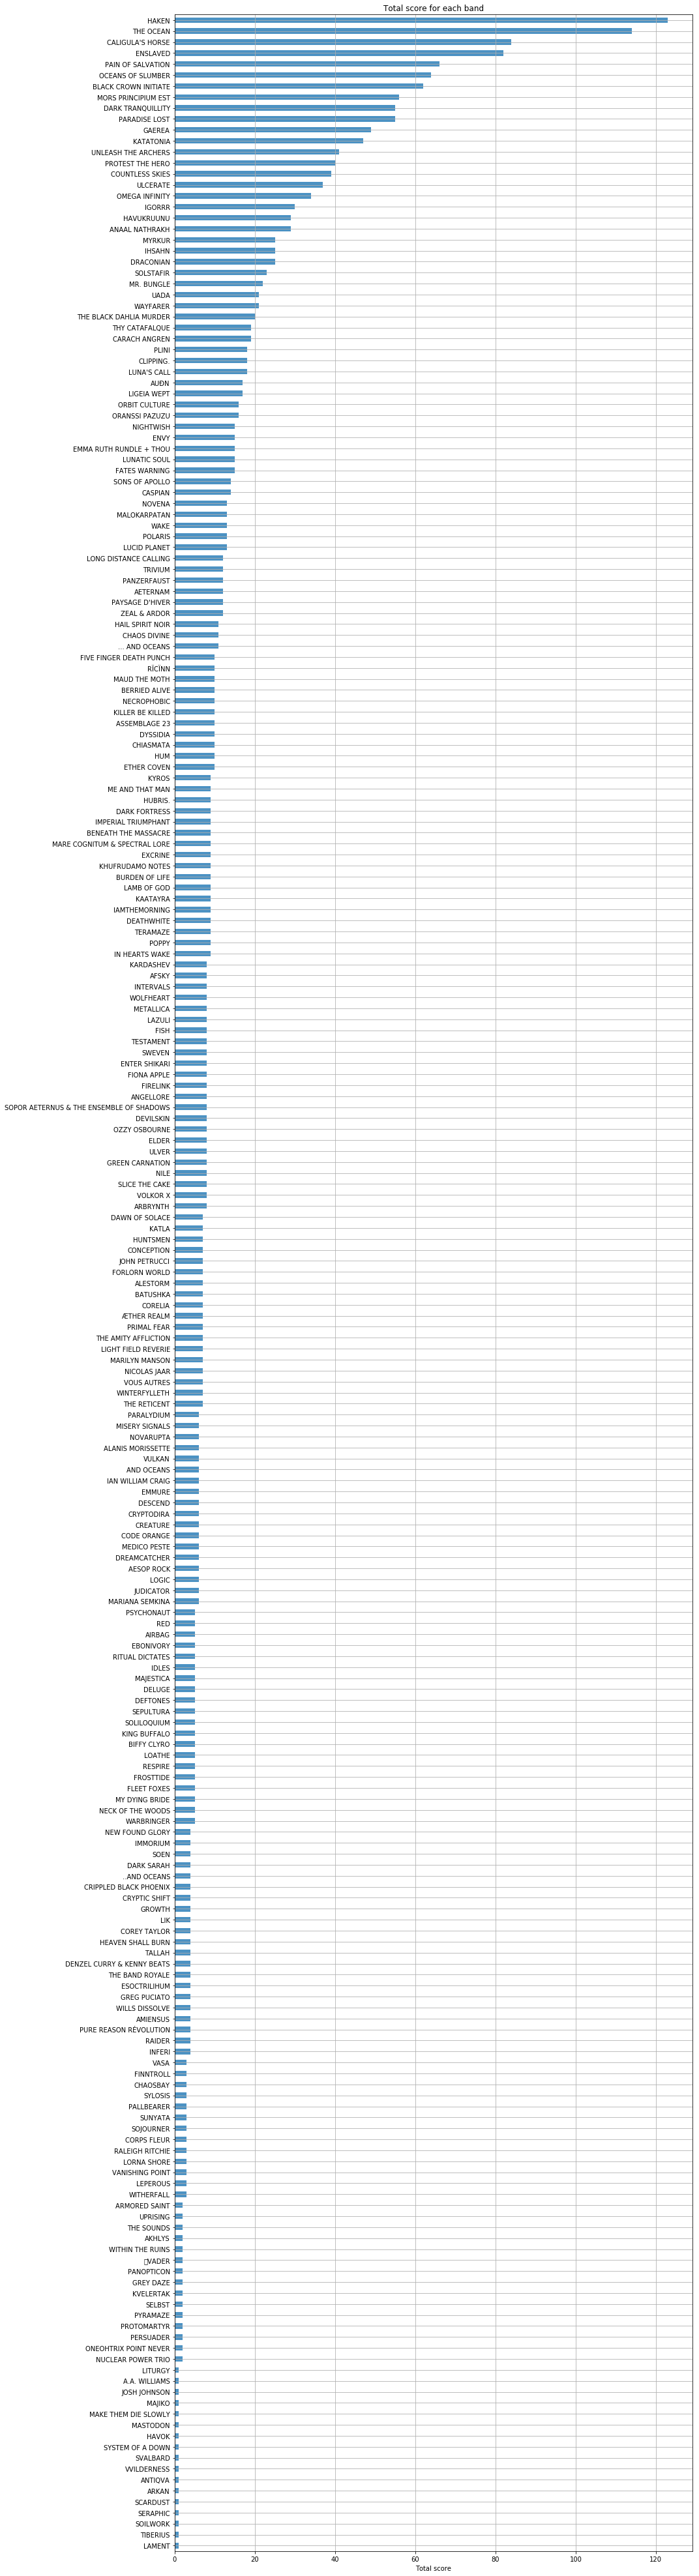

In [66]:
pylab.figure(figsize=(15,55))

#pylab.font_manager.FontProperties(fname=os.path.expanduser('~/Library/Fonts/ipaexg.ttf'))

total_score = pd_score.sum(axis=1)
#total_score.sort()
ax = total_score.sort_values(ascending=True).plot('barh', alpha=0.8)
ax.xaxis.tick_top()
ax.xaxis.tick_bottom()

pylab.title('Total score for each band')
pylab.xlabel('Total score')
pylab.grid()
pylab.tight_layout()
pylab.savefig('2020Total.png')


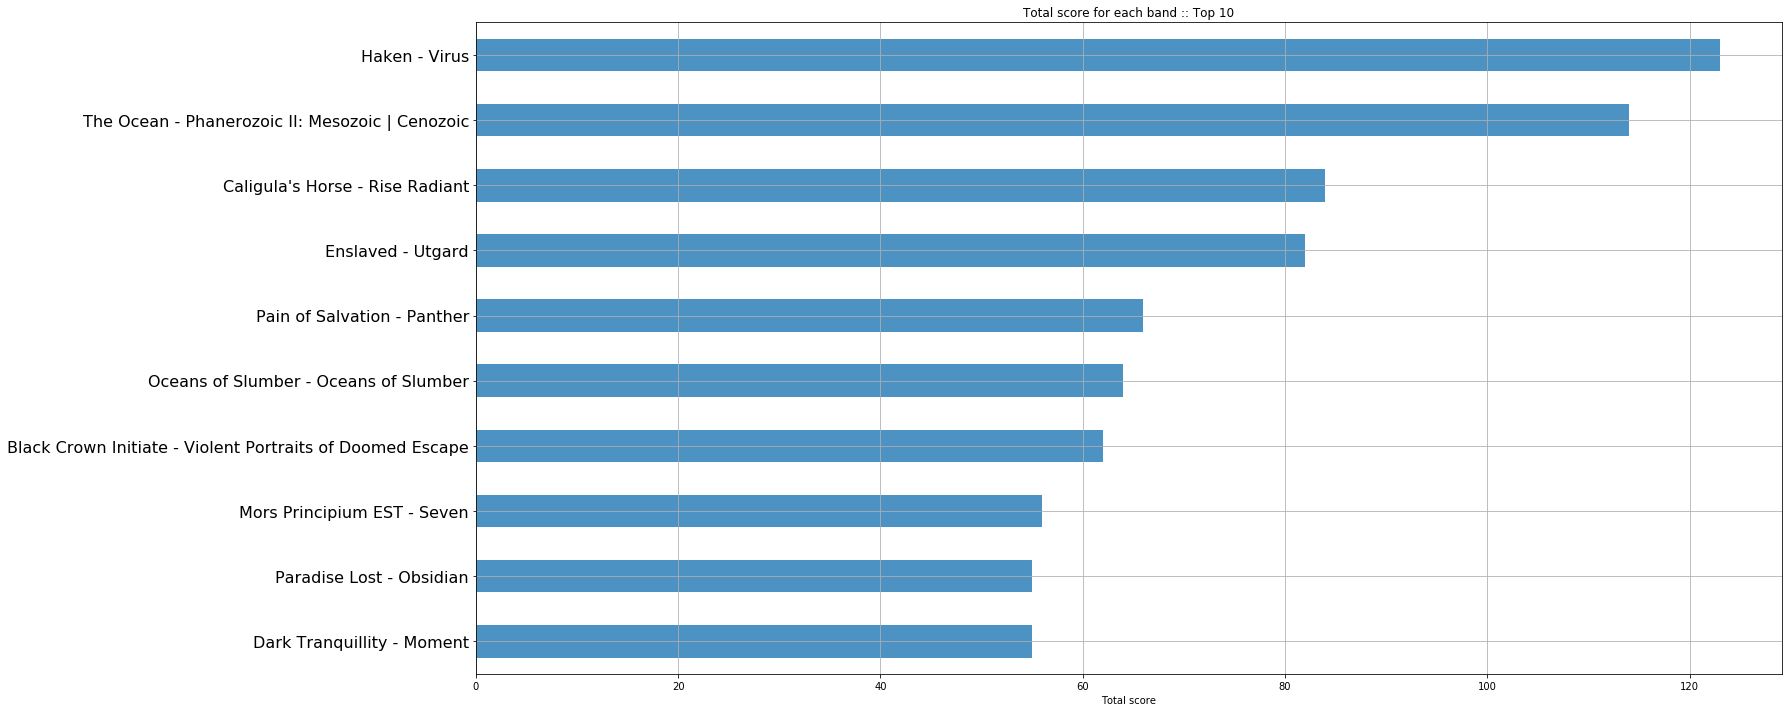

In [71]:
pylab.figure(figsize=(25,10))


total_score = pd_score.sum(axis=1)
#total_score.sort()
total_score.sort_values(ascending=True)[-10:].plot('barh', alpha=0.8)

pylab.title('Total score for each band :: Top 10', fontsize=12)
pylab.xlabel('Total score')
ax = pylab.gca()
label_top10.reverse()
ax.set_yticklabels(label_top10, fontsize=16)
pylab.grid()

pylab.tight_layout()
pylab.savefig('2020Top10.png')

In [36]:
label_top10.reverse()

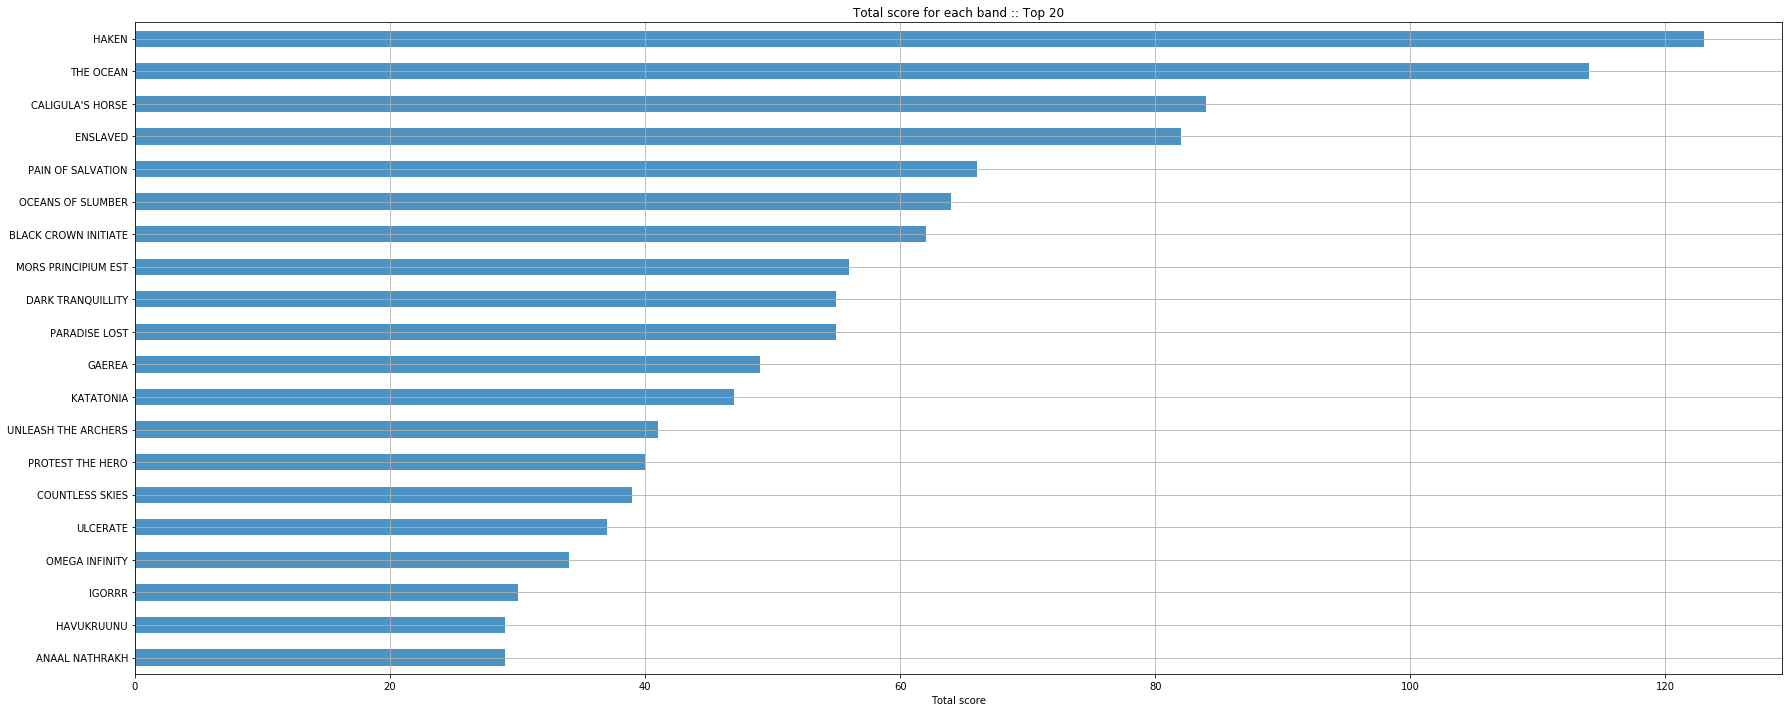

In [69]:
pylab.figure(figsize=(25,10))


total_score = pd_score.sum(axis=1)
#total_score.sort()
total_score.sort_values(ascending=True)[-20:].plot('barh', alpha=0.8)

pylab.title('Total score for each band :: Top 20')
pylab.xlabel('Total score')

pylab.tight_layout()
pylab.grid()
pylab.savefig('2020Top20.png')



## Now we do that for each voting tier 

<div class="alert alert-info" role="alert">
  We export the data to excel 
</div>

In [70]:
pd_score.to_excel('FinalNeo2020Scores.xlsx')